In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import seaborn as sns
from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')


In [3]:
train.isnull().sum()[train.isnull().sum()>100]

LotFrontage     259
Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [4]:
test.isnull().sum()[test.isnull().sum()>100]

LotFrontage     227
Alley          1352
FireplaceQu     730
PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int64

In [5]:
train.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'] , axis =1 , inplace=True)
test.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'] , axis =1 , inplace=True)

In [6]:
total_df = pd.concat([train, test]) 
total_df.set_index('Id',inplace=True)

In [7]:
total_df.isnull().sum().sort_values(ascending=False).head(30)

SalePrice       1459
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
BsmtFinSF1         1
BsmtFinSF2         1
Exterior2nd        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
Electrical         1
Exterior1st        1
KitchenQual        1
SaleType           1
GarageCars         1
dtype: int64

In [8]:
total_df['LotFrontage'] = total_df.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))
#     total_df[i].fillna('NA',inplace=True)
# train['MasVnrArea'].fillna(train['MasVnrArea'].median(),inplace=True)
# test['LotFrontage'].fillna(test['LotFrontage'].median(),inplace=True)
# test['MasVnrArea'].fillna(0,inplace=True)
# train['TotalBsmtSF'].fillna(0,inplace=True)
# test['TotalBsmtSF'].fillna(0,inplace=True)
# test['KitchenQual'].fillna('TA',inplace=True)
# test['SaleType'].fillna(test['SaleType'].value_counts().idxmax(),inplace=True)
# test['Exterior1st'].fillna(test['Exterior1st'].value_counts().idxmax(),inplace=True)
# train['BsmtQual'].fillna('NA',inplace=True)
# test['BsmtQual'].fillna('NA',inplace=True)
# train['BsmtCond'].fillna('NA',inplace=True)
# test['BsmtCond'].fillna('NA',inplace=True)

# train['PoolArea'].fillna(0,inplace=True)
# test['PoolArea'].fillna(0,inplace=True)

In [9]:
print('those with nan BsmtCond but non_nan BsmtQual {}'.format(total_df[(pd.isnull(total_df.BsmtCond))&(pd.notnull(total_df.BsmtQual))].index))
print('those with nan BsmtQual but non_nan BsmtCond {}'.format(total_df[(pd.isnull(total_df.BsmtQual))&(pd.notnull(total_df.BsmtCond))].index))
total_df.loc[2041,'BsmtCond'] = total_df['BsmtCond'].value_counts().index[0]
total_df.loc[2186,'BsmtCond'] = total_df['BsmtCond'].value_counts().index[0]
total_df.loc[2525,'BsmtCond'] = total_df['BsmtCond'].value_counts().index[0]
total_df.loc[2218,'BsmtQual'] = total_df['BsmtQual'].value_counts().index[0]
total_df.loc[2219,'BsmtQual'] = total_df['BsmtQual'].value_counts().index[0]

those with nan BsmtCond but non_nan BsmtQual Int64Index([2041, 2186, 2525], dtype='int64', name='Id')
those with nan BsmtQual but non_nan BsmtCond Int64Index([2218, 2219], dtype='int64', name='Id')


In [10]:
print('those with nan BsmtExposure but non_nan BsmtQual {}'.format(total_df[(pd.isnull(total_df.BsmtExposure))&(pd.notnull(total_df.BsmtQual))].index))
total_df.loc[949,'BsmtExposure'] = total_df['BsmtExposure'].value_counts().index[0]
total_df.loc[1488,'BsmtExposure'] = total_df['BsmtExposure'].value_counts().index[0]
total_df.loc[2349,'BsmtExposure'] = total_df['BsmtExposure'].value_counts().index[0]

those with nan BsmtExposure but non_nan BsmtQual Int64Index([949, 1488, 2349], dtype='int64', name='Id')


In [11]:
print('the id with nan TotalBsmtSF, BsmtUnfSF , BsmtFullBath , BsmtHalfSF is {}'.format(total_df[(pd.isnull(total_df.BsmtFullBath)) & (pd.isnull(total_df.TotalBsmtSF)) & (pd.isnull(total_df.BsmtHalfBath))
                                                                                         & (pd.isnull(total_df.BsmtUnfSF))].index))

the id with nan TotalBsmtSF, BsmtUnfSF , BsmtFullBath , BsmtHalfSF is Int64Index([2121], dtype='int64', name='Id')


In [12]:
print('those with nan MasVnrType but non_nan MasVnrArea {}'.format(total_df[(pd.isnull(total_df.MasVnrType))&(pd.notnull(total_df.MasVnrArea))].index))
total_df.loc[2611,'MasVnrType'] = total_df['MasVnrType'].value_counts().index[0]

those with nan MasVnrType but non_nan MasVnrArea Int64Index([2611], dtype='int64', name='Id')


In [13]:
print('those with nan GarageFinish but non_nan GarageType {}'.format(total_df[(pd.isnull(total_df.GarageFinish))&(pd.notnull(total_df.GarageType))].index))
print('Nan garagecars {}'.format(total_df[pd.isnull(total_df['GarageCars'])].index))
# id=2577 has no garage but id=2127 has
total_df.loc[2577,'GarageCars'] = 0
total_df.loc[2577,'GarageArea'] = 0
total_df.loc[2577,'GarageFinish'] = 'none'
total_df.loc[2577,'GarageQual'] = 'none'
total_df.loc[2577,'GarageCond'] = 'none'
total_df.loc[2577,'GarageYrBlt'] = 0
total_df.loc[2127,'GarageCars'] = total_df['GarageCars'].median()
total_df.loc[2127,'GarageArea'] = total_df['GarageArea'].median()
total_df.loc[2127,'GarageFinish'] = total_df['GarageFinish'].value_counts().index[0]
total_df.loc[2127,'GarageQual'] = total_df['GarageQual'].value_counts().index[0]
total_df.loc[2127,'GarageCond'] = total_df['GarageCond'].value_counts().index[0]
total_df.loc[2127,'GarageYrBlt'] = total_df['GarageYrBlt'].median()


those with nan GarageFinish but non_nan GarageType Int64Index([2127, 2577], dtype='int64', name='Id')
Nan garagecars Int64Index([2577], dtype='int64', name='Id')


In [14]:
total_df['MSZoning'] = total_df.groupby('Neighborhood')['MSZoning'].apply(lambda x: x.fillna(x.value_counts().index[0]))
total_df['KitchenQual'] = total_df.groupby('Neighborhood')['KitchenQual'].apply(lambda x: x.fillna(x.value_counts().index[0]))
total_df['Exterior1st'] = total_df.groupby(['Neighborhood','MSZoning'])['Exterior1st'].apply(lambda x: x.fillna(x.value_counts().index[0]))
total_df['Exterior2nd'] = total_df.groupby(['Neighborhood','MSZoning'])['Exterior2nd'].apply(lambda x: x.fillna(x.value_counts().index[0]))
total_df['BsmtFullBath'] = total_df.groupby(['Neighborhood','MSZoning'])['BsmtFullBath'].apply(lambda x: x.fillna(x.median()))
total_df['BsmtHalfBath'] = total_df.groupby(['Neighborhood','MSZoning'])['BsmtHalfBath'].apply(lambda x: x.fillna(x.median()))
total_df['Functional'].fillna(total_df['Functional'].value_counts().index[0],inplace=True)
# total_df['Utilities'].fillna(total_df['Utilities'].value_counts().index[0],inplace=True)
total_df['Electrical'].fillna(total_df['Electrical'].value_counts().index[0],inplace=True)
total_df['SaleType'].fillna(total_df['SaleType'].value_counts().index[0],inplace=True)
total_df['TotalBsmtSF'] = total_df.groupby(['Neighborhood','MSZoning'])['TotalBsmtSF'].apply(lambda x: x.fillna(x.median()))
total_df['BsmtUnfSF'] = total_df.groupby(['Neighborhood','MSZoning'])['BsmtUnfSF'].apply(lambda x: x.fillna(x.median()))



In [15]:
qual_cols_to_fill = ['GarageCond','GarageFinish','GarageQual','BsmtCond','BsmtQual','BsmtExposure','MasVnrType','GarageType']
for i in qual_cols_to_fill:
    total_df[i].fillna('none',inplace=True)
quant_cols_to_fill = ['GarageYrBlt','MasVnrArea']
for i in quant_cols_to_fill:
    total_df[i].fillna(0,inplace=True)



In [16]:
total_df['Age'] = total_df['YrSold'] - total_df['YearBuilt']
total_df['Remodeled_Age'] = total_df['YrSold'] - total_df['YearRemodAdd']
# train['high_level_garage'] = [ 1 if (x == 'Gd') | (x == 'Ex') else 0 for x in train['GarageQual']]
# train['low_level_garage'] = [ 1 if (x == 'Fa') | (x == 'Po') else 0 for x in train['GarageQual']]
# test['high_level_garage'] = [ 1 if (x == 'Gd') | (x == 'Ex') else 0 for x in test['GarageQual']]
# test['low_level_garage'] = [ 1 if (x == 'Fa') | (x == 'Po') else 0 for x in test['GarageQual']]
#train['has_garage'] = [1 if (x != 0) else 0 for x in train['GarageType']]
# test['GarageType'].fillna(0,inplace=True)
#test['has_garage'] = [1 if (x != 0) else 0 for x in test['GarageType']]
# train['PoolQC'].fillna(0,inplace=True)
# train['has_pool'] = [1 if (x != 0) else 0 for x in train['PoolQC']]
# test['PoolQC'].fillna(0,inplace=True)
# test['has_pool'] = [1 if (x != 0) else 0 for x in test['PoolQC']]
# train['Alley_Grvl'] = [1 if (x == 'Grvl') else 0 for x in train['Alley']]
# test['Alley_Grvl'] = [1 if (x == 'Grvl') else 0 for x in test['Alley']]
total_df['has_central_air'] = [1 if (x == 'Y') else 0 for x in total_df['CentralAir']]
# test['has_central_air'] = [1 if (x == 'Y') else 0 for x in test['CentralAir']]
total_df['Number_of_bathrooms'] = total_df['BsmtFullBath'] + 0.5*total_df['BsmtHalfBath'] + total_df['FullBath'] + 0.5*total_df['HalfBath']
# test['Number_of_bathrooms'] = test['BsmtFullBath'] + 0.5*test['BsmtHalfBath'] + test['FullBath'] + 0.5*test['HalfBath']
# test['Number_of_bathrooms'].fillna(test['Number_of_bathrooms'].median(),inplace=True)
# test['GarageCars'].fillna(test['GarageCars'].median(),inplace=True)
# test['GarageArea'].fillna(test['GarageArea'].median(),inplace=True)
train['PriceperSQFeet'] =train['SalePrice']/train['LotArea']
s = train.groupby('Neighborhood')['PriceperSQFeet'].mean()
total_df["Neighborhood"] = total_df["Neighborhood"].replace(s)
# test["Neighborhood"] = test["Neighborhood"].replace(s)
#train['LotArea'] = (train['LotArea'] - train['LotArea'].mean())/train['LotArea'].std()
# train['BsmtExposure'] =[1 if (x == 'Gd') | (x == 'Av') else 0 for x in train['BsmtExposure']]
#test['BsmtExposure'] =[1 if (x == 'Gd') | (x == 'Av') else 0 for x in test['BsmtExposure']]
total_df['is_2_storey'] = [1 if x != 0 else 0 for x in total_df['2ndFlrSF']]
# test['is_2_storey'] = [1 if x != 0 else 0 for x in test['2ndFlrSF']]

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
total_df = pd.get_dummies(total_df, prefix=['MSZoningis' , 'Street' , 'LandConour' , 'LotConfig' , 'Electrical' ,
                                       'isclose' , 'isclose2' , 'BldgType' , 'HouseStyle' , 'ext1st' , 'MasVnrType' , 'Foundation' , 
                                       'BsmtFinType1' , 'Heating' , 'Functional' , 'GarageType' , 'SaleType' , 'SaleCondition' , 'RoofMatl' , 'BsmtExposure' ,'Exterior2nd'], 
                       columns=['MSZoning','Street','LandContour','LotConfig', 'Electrical',
                                'Condition1','Condition2','BldgType', 'HouseStyle' , 'Exterior1st' , 'MasVnrType' , 'Foundation' , 
                                 'BsmtFinType1' , 'Heating'  , 'Functional',  'GarageType' , 'SaleType' , 'SaleCondition' , 'RoofMatl' , 'BsmtExposure' , 'Exterior2nd'])



In [18]:
total_df['PavedDrive'] = total_df['PavedDrive'].astype(CategoricalDtype(categories = ['N','P','Y'],ordered=True))
#test['PavedDrive'] = test['PavedDrive'].astype(CategoricalDtype(categories = ['N','P','Y'],ordered=True))
total_df['LandSlope'] = total_df['LandSlope'].astype(CategoricalDtype(categories = ['Sev','Mod','Gtl'],ordered=True))
#test['LandSlope'] = test['LandSlope'].astype(CategoricalDtype(categories = ['Sev','Mod','Gtl'],ordered=True))
total_df['ExterQual'] = total_df['ExterQual'].astype(CategoricalDtype(categories = ['Po','Fa','TA','Gd','Ex'],ordered=True))
#test['ExterQual'] = test['ExterQual'].astype(CategoricalDtype(categories = ['Po','Fa','TA','Gd','Ex'],ordered=True))
total_df['ExterCond'] = total_df['ExterCond'].astype(CategoricalDtype(categories = ['Po','Fa','TA','Gd','Ex'],ordered=True))
#test['ExterCond'] = test['ExterCond'].astype(CategoricalDtype(categories = ['Po','Fa','TA','Gd','Ex'],ordered=True))
total_df['KitchenQual'] = total_df['KitchenQual'].astype(CategoricalDtype(categories = ['Po','Fa','TA','Gd','Ex'],ordered=True))
total_df['HeatingQC'] = total_df['HeatingQC'].astype(CategoricalDtype(categories = ['Po','Fa','TA','Gd','Ex'],ordered=True))
total_df['LotShape'] = total_df['LotShape'].astype(CategoricalDtype(categories = ['IR3','IR2','IR1','Reg'],ordered=True))
total_df['BsmtCond'] = total_df['BsmtCond'].astype(CategoricalDtype(categories = ['none','Po','Fa','TA','Gd'],ordered=True))
total_df['BsmtQual'] = total_df['BsmtQual'].astype(CategoricalDtype(categories = ['none','Po','Fa','TA','Gd','Ex'],ordered=True))
total_df['BsmtCond'] = total_df['BsmtCond'].astype(CategoricalDtype(categories = ['none','Po','Fa','TA','Gd'],ordered=True))
total_df['BsmtExposure'] = total_df['BsmtExposure'].astype(CategoricalDtype(categories = ['none','No','Mn','Av','Gd'],ordered=True))
total_df['GarageFinish'] = total_df['GarageFinish'].astype(CategoricalDtype(categories = ['none','Unf','RFn','Fin'],ordered=True))
total_df['GarageQual'] = total_df['BsmtCond'].astype(CategoricalDtype(categories = ['none','Po','Fa','TA','Gd','Ex'],ordered=True))
total_df['GarageCond'] = total_df['BsmtCond'].astype(CategoricalDtype(categories = ['none','Po','Fa','TA','Gd','Ex'],ordered=True))
lb1 = LabelEncoder()
total_df['LandSlope'] = lb1.fit_transform(total_df['LandSlope'])
# test['LandSlope'] = lb1.transform(test['LandSlope'])
lb2 = LabelEncoder()
total_df['PavedDrive'] = lb2.fit_transform(total_df['PavedDrive'])
# test['PavedDrive'] = lb2.transform(test['PavedDrive'])
lb3 = LabelEncoder()
total_df['ExterQual'] = lb3.fit_transform(total_df['ExterQual'])
# test['ExterQual'] = lb3.transform(test['ExterQual'])
lb4 = LabelEncoder()
total_df['ExterCond'] = lb4.fit_transform(total_df['ExterCond'])
# test['ExterCond'] = lb4.transform(test['ExterCond'])
lb5 = LabelEncoder()
total_df['KitchenQual'] = lb5.fit_transform(total_df['KitchenQual'])
# test['KitchenQual'] = lb5.transform(test['KitchenQual'])
lb6 = LabelEncoder()
total_df['HeatingQC'] = lb6.fit_transform(total_df['HeatingQC'])
lb7 = LabelEncoder()
total_df['LotShape'] = lb7.fit_transform(total_df['LotShape'])
# test['HeatingQC'] = lb5.transform(test['HeatingQC'])
lb8 = LabelEncoder()
total_df['BsmtQual'] = lb8.fit_transform(total_df['BsmtQual'])
lb9 = LabelEncoder()
total_df['BsmtCond'] = lb9.fit_transform(total_df['BsmtCond'])
lb10 = LabelEncoder()
total_df['GarageFinish'] = lb10.fit_transform(total_df['GarageFinish'])
lb11 = LabelEncoder()
total_df['BsmtExposure'] = lb11.fit_transform(total_df['BsmtExposure'])
lb12 = LabelEncoder()
total_df['GarageQual'] = lb12.fit_transform(total_df['GarageQual'])
lb13 = LabelEncoder()
total_df['GarageCond'] = lb13.fit_transform(total_df['GarageCond'])

KeyError: 'BsmtExposure'

In [19]:
# final_df['Basement_qual'] = final_df['BsmtCond'] * final_df['BsmtQual']
total_df['garage_score'] = total_df['GarageCars']*total_df['GarageArea']

#final_df['house_qual'] = final_df['OverallCond'] + final_df['OverallQual']

In [20]:
total_df.drop(['Utilities' , 'YearBuilt' ,'YearRemodAdd' , 'RoofStyle' , 'CentralAir'  , 'GarageYrBlt' ,
           'BsmtFinSF1' , 'BsmtFinSF2' , 'BsmtFinType2' , 'BsmtUnfSF' ,  'LowQualFinSF' , 
            'BsmtFullBath' , 'BsmtHalfBath' , 'FullBath' , 'HalfBath' ,  
            'MiscVal' ,  'PoolArea' ,  '1stFlrSF' , '2ndFlrSF' , 'GarageCars' , 'GarageArea' , 'OverallCond'
        ] , axis = 1 , inplace = True)

In [21]:
train = total_df.loc[total_df['SalePrice'].notna()]
test = total_df.loc[total_df['SalePrice'].isna()]


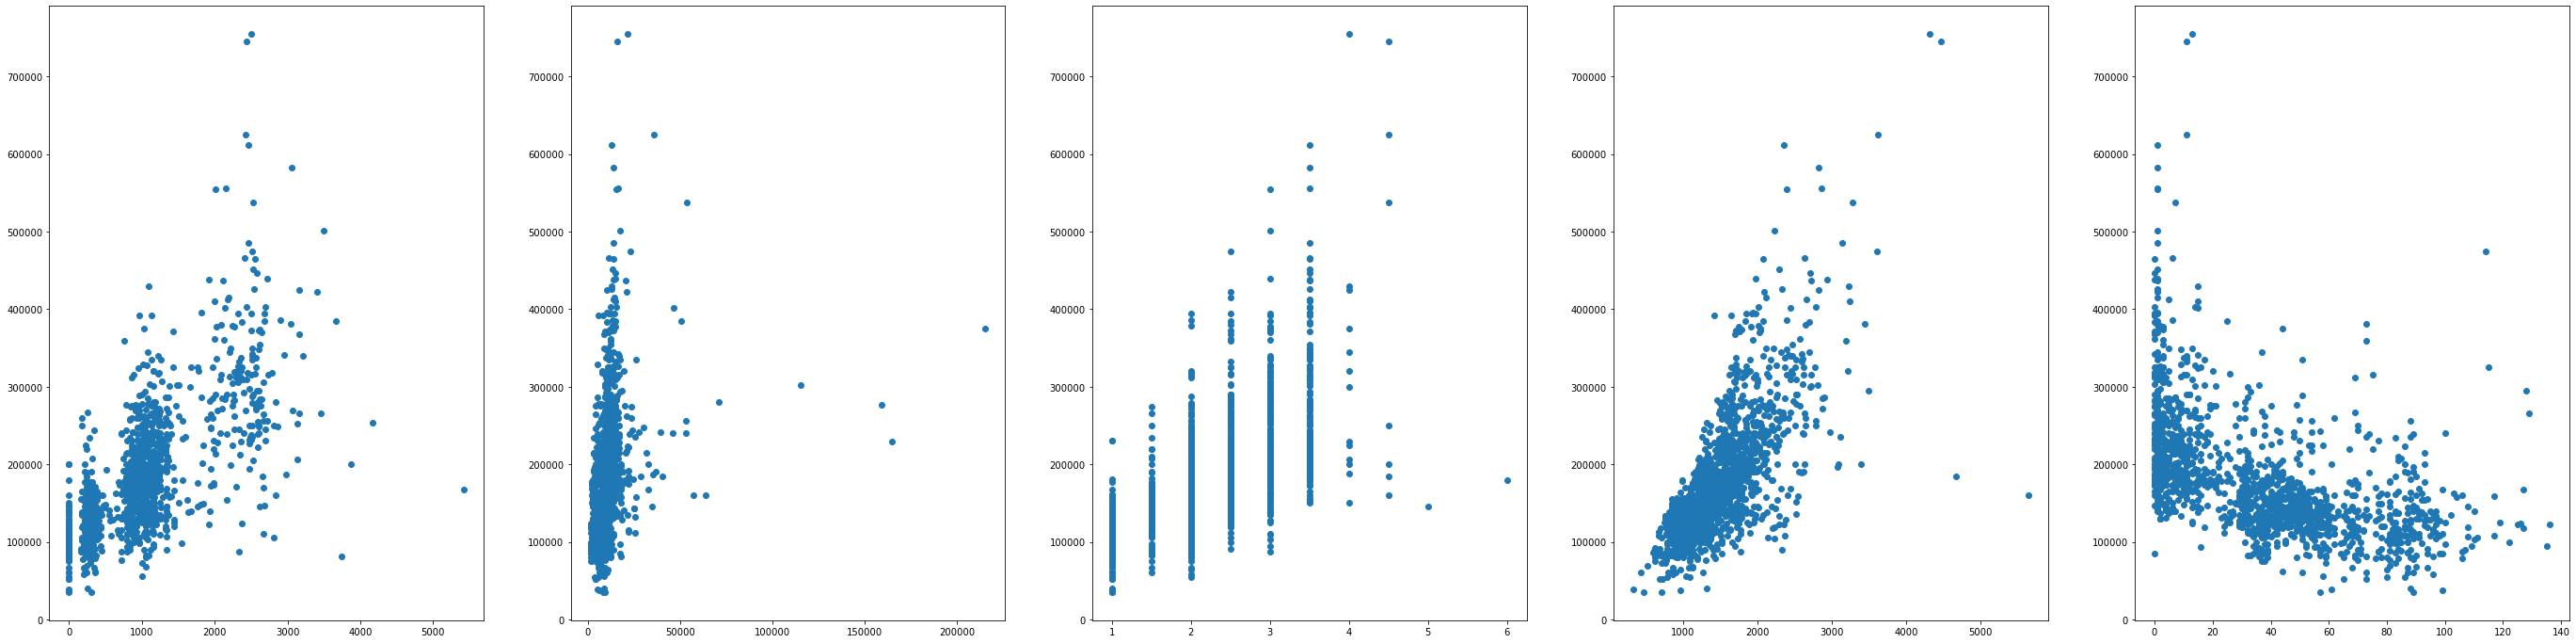

In [22]:
fig , (ax1, ax2, ax3 , ax4 , ax5) = plt.subplots(1,5 , figsize = (48,12))
ax1.scatter(train['garage_score'],train['SalePrice'])
ax2.scatter(train['LotArea'],train['SalePrice'])
ax3.scatter(train['Number_of_bathrooms'],train['SalePrice'])
ax4.scatter(train['GrLivArea'],train['SalePrice'])
ax5.scatter(train['Age'],train['SalePrice'])

skewness of SalePrice is 1.8828757597682129, skewness of GrLivArea is 1.3665603560164552, skewness of LotFrontage is 2.2135559895880035


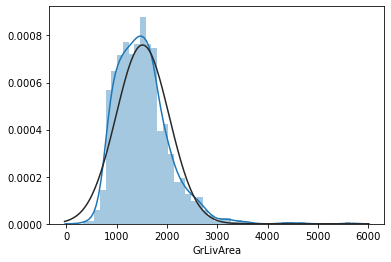

In [23]:
from scipy.stats import norm
print('skewness of SalePrice is {}, skewness of GrLivArea is {}, skewness of LotFrontage is {}'.format(train['SalePrice'].skew(),train['GrLivArea'].skew(),
                                                                                                                                       train['LotFrontage'].skew())) 
sns.distplot(train['GrLivArea'] , fit =norm)

In [24]:
#Removing skewness of train using boxcox
train['SalePrice'] ,fitted_lambda1 = stats.boxcox(train['SalePrice'])
train['GrLivArea'] ,fitted_lambda2 = stats.boxcox(train['GrLivArea'])
train['LotFrontage'] ,fitted_lambda3 = stats.boxcox(train['LotFrontage'])
train['LotArea'] ,fitted_lambda4 = stats.boxcox(train['LotArea'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [25]:
#removing skewness of test data using boxcox
test['GrLivArea'] = stats.boxcox(test['GrLivArea'] , fitted_lambda2)
test['LotFrontage'] = stats.boxcox(test['LotFrontage'] , fitted_lambda3)
test['LotArea'] = stats.boxcox(test['LotArea'] , fitted_lambda4)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [26]:
# train['GrLivArea'] = np.log(train['GrLivArea'])
# train['LotArea'] = np.log(train['LotArea'])
# train['SalePrice'] = np.log(train['SalePrice'])
# train['LotFrontage'] = np.log(train['LotFrontage'])
# #train['TotalBsmtSF'] = np.sqrt(train['TotalBsmtSF'])
# #train['MasVnrArea'] = np.log(train['MasVnrArea'])
# test['GrLivArea'] = np.log(test['GrLivArea'])
# test['LotArea'] = np.log(test['LotArea'])
# test['LotFrontage'] = np.log(test['LotFrontage'])
# #test['TotalBsmtSF'] = np.sqrt(test['TotalBsmtSF'])
# #test['MasVnrArea'] = np.log(test['MasVnrArea'])
# #train['garage_score'] = np.log(train['garage_score'])

In [27]:
# train = train[(train.garage_score<5000) & (train.GrLivArea<4500) & (train.Number_of_bathrooms<6)]

In [28]:
test.drop('SalePrice',axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
#train.corr().loc['GarageYrBlt','SalePrice']

In [30]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# X = train.drop('SalePrice',axis=1)
# y = train['SalePrice']
# param_grid = { 'n_estimators' : [2000] }
# grid = GridSearchCV(RandomForestRegressor(n_jobs=-1,random_state=1 , max_features =19) , param_grid = param_grid ).fit(X,y)

In [31]:
print(grid.best_score_,grid.best_estimator_)
grid.best_estimator_


NameError: name 'grid' is not defined

In [32]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn import metrics
# X = train.drop('SalePrice',axis=1)
# y = train['SalePrice']
# param_grid = {'n_estimators' : [2100] , 'max_depth':[4] , 'learning_rate' : [0.01]}
# grid = GridSearchCV(GradientBoostingRegressor(random_state=1) , param_grid = param_grid).fit(X,y)

In [33]:
import xgboost as xgb
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']
xg = xgb.XGBRegressor(booster='gbtree',
             colsample_bylevel=0.6971640307744038, colsample_bynode=1,
             colsample_bytree=0.6222251306452113, gamma=0.045557016198868025,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.012334455088591312, max_delta_step=0, max_depth=4,
             min_child_weight=1,  monotone_constraints='()',
             n_estimators=2100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=2.1713829044702413, scale_pos_weight=1,
             subsample=0.8459257473555255, tree_method='exact',
             validate_parameters=1, verbosity=None).fit(X,y)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields LotShape, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, GarageFinish, GarageQual, GarageCond, PavedDrive

In [34]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,xb_b.predict(X_train))

NameError: name 'xb_b' is not defined

In [35]:
# test = pd.get_dummies(test, prefix=['MSZoningis' , 'Streets' , 'LotShapes' , 'LandConouris' , 'LotConfigis' ,
#                                       'NeiH' , 'isclose' , 'isclose2' , 'BldgType' , 'HouseStyle' , 'ext1st' , 'MasVnrType' , 'Foundationis' , 'BsmtCond' ,
#                                       'BsmtExposure' , 'BsmtFinType1' , 'Heating' , 'Functional' , ' FireplaceQu' , 'GarageType' , 'GarageCond' , 'SaleType' , 'SaleCondition'], 
#                        columns=['MSZoning','Street','LotShape','LandContour','LotConfig',
#                                 'Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle' , 'Exterior1st' , 'MasVnrType' , 'Foundation' , 'BsmtCond' ,
#                                 'BsmtExposure' , 'BsmtFinType1' , 'Heating'  , 'Functional', 'FireplaceQu' , 'GarageType', 'GarageCond' , 'SaleType' , 'SaleCondition'])
# test.drop(['Utilities' , 'Alley' , 'Exterior2nd' , 'MSSubClass' , 'YearBuilt' ,'YearRemodAdd' , 'RoofStyle' , 'RoofMatl' , 'BsmtQual' , 'CentralAir'  ,
#            'BsmtFinSF1' , 'BsmtFinSF2' , 'BsmtFinType2' , 'BsmtUnfSF' , 'Electrical' , '1stFlrSF' , '2ndFlrSF' ,'LowQualFinSF' , 'HeatingQC' ,
#            'TotRmsAbvGrd' , 'BsmtFullBath' , 'BsmtHalfBath' , 'FullBath' , 'HalfBath' ,  'GarageYrBlt' , 'GarageArea' , 'GarageFinish' , 'GarageQual',
#            'Fence' , 'PoolQC' , 'PoolArea' , 'MiscFeature','MiscVal'] , axis = 1 , inplace = True)

In [36]:
test.columns[test.isnull().any()]

Index([], dtype='object')

In [37]:
 from scipy.special import inv_boxcox
result = inv_boxcox(xg.predict(test),fitted_lambda1)
output = pd.DataFrame({'Id': np.arange(1461,1461+len(test)), 'SalePrice': result})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

NameError: name 'xg' is not defined

In [38]:
# np.arange(1461,1461+len(test))

In [39]:
#To find the missing values of MSZoning based on the neighborhood
new = test.groupby(['Neighborhood','MSZoning']).agg({'MSZoning':'count'})
new.rename(columns = {'MSZoning':'Number'},inplace=True)
# new.groupby(level=0).idxmax()
new = new.sort_values(by = 'Number', ascending = False)
# new.groupby(level=0).head(1)
new = new.groupby(level=0).head(1)
Nei_Most_Fr = new.reset_index(level=1).drop('Number',axis =1)
# new.loc[new.groupby(level=0).idxmax()]
#new.reset_index(level =1,inplace=True)
# type_helper = new.idxmax()
# type_helper
Nei_Most_Fr

KeyError: 'MSZoning'

(array([0., 0., 0., 0., 0.]),
 array([  1000,   2000,  10000,  40000, 100000, 250000]),
 <a list of 5 Patch objects>)

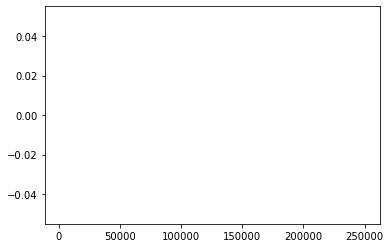

In [40]:
from matplotlib import pyplot as plt
plt.hist(train.LotArea , [1000,2000,10000,40000,100000,250000])

In [41]:
train.Fence.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Fence'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<BarContainer object of 12 artists>

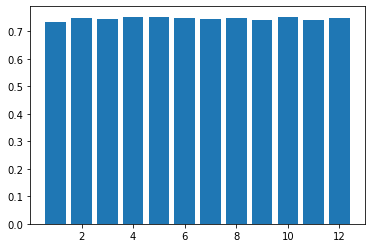

In [42]:
train['Price_Per_Unit'] = train['SalePrice']/train['LotArea']
sa = train.groupby('MoSold').agg({'Price_Per_Unit':'mean'})['Price_Per_Unit']
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],sa.values)

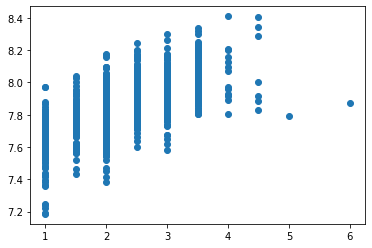

In [43]:
plt.scatter(train.Number_of_bathrooms,train.SalePrice)

In [44]:
train.PoolQC.value_counts()

AttributeError: 'DataFrame' object has no attribute 'PoolQC'

In [45]:
len(s)

25

In [46]:
s = [train.loc[(train.Alley == 'Grvl'),'SalePrice'].mean() , train.loc[(train.Alley == 'Pave'),'SalePrice'].mean() , train.loc[(train.Alley != 'Grvl') & (train.Alley != 'Pave'),'SalePrice'].mean()]
plt.bar([0,1,2],s)
plt.xticks(ticks = [0,1,2],labels=['Grvl','Pave' , 'No_Alley'])

AttributeError: 'DataFrame' object has no attribute 'Alley'

([<matplotlib.axis.XTick at 0x7fdbbdcbb990>,
 [Text(0, 0, 'with_central_air'), Text(0, 0, 'without_central_air')])

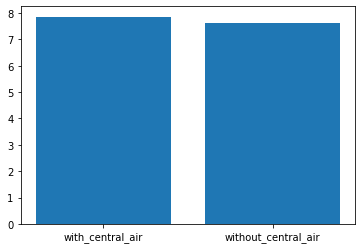

In [47]:
s = [train.loc[(train.has_central_air == 1),'SalePrice'].mean() , train.loc[train.has_central_air == 0,'SalePrice'].mean()]
plt.bar([0,1],s)
plt.xticks(ticks = [0,1],labels=['with_central_air','without_central_air'])                                                                             

In [48]:
train['Fence'].fillna(0,inplace=True)
s = [train.loc[(train.Fence != 0),'SalePrice'].mean() , train.loc[train.Fence == 0,'SalePrice'].mean()]
plt.bar([0,1],s)
plt.xticks(ticks = [0,1],labels=['with_fence','without_fence'])  

KeyError: 'Fence'

In [49]:
s = [train.loc[(train.has_basement == 1),'SalePrice'].mean() , train.loc[train.has_basement == 0,'SalePrice'].mean()]
plt.bar([0,1],s)
plt.xticks(ticks = [0,1],labels=['with_basement','without_basement'])                                                                             

AttributeError: 'DataFrame' object has no attribute 'has_basement'

([<matplotlib.axis.XTick at 0x7fdbbdc1ba90>,
 [Text(0, 0, 'Pave'), Text(0, 0, 'Partial'), Text(0, 0, 'Dirt')])

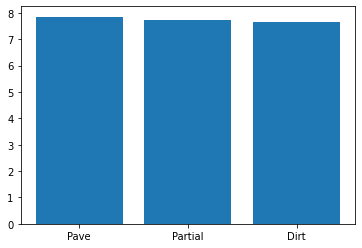

In [50]:
s = [train.loc[(train.PavedDrive == 'Y'),'SalePrice'].mean() , train.loc[(train.PavedDrive == 'P'),'SalePrice'].mean() , train.loc[train.PavedDrive == 'N','SalePrice'].mean()]
plt.bar([0,1,2],s)
plt.xticks(ticks = [0,1,2],labels=['Pave','Partial' , 'Dirt'])

([<matplotlib.axis.XTick at 0x7fdbd2107350>,
 [Text(0, 0, 'Ex'), Text(0, 0, 'TA'), Text(0, 0, 'POO')])

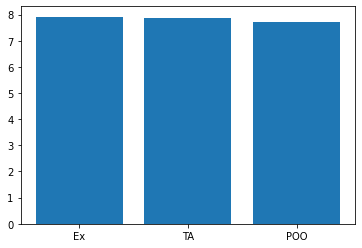

In [51]:
s = [train.loc[(train.GarageQual == 'Ex')|(train.GarageQual == 'Gd'),'SalePrice'].mean() , train.loc[(train.GarageQual == 'TA'),'SalePrice'].mean() ,
     train.loc[(train.GarageQual == 'Fa')|(train.GarageQual == 'Po'),'SalePrice'].mean()]
plt.bar([0,1,2],s)
plt.xticks(ticks = [0,1,2],labels=['Ex','TA' , 'POO'])

([<matplotlib.axis.XTick at 0x7fdbbdb67850>,
 [Text(0, 0, 'Ex'), Text(0, 0, 'TA'), Text(0, 0, 'POO')])

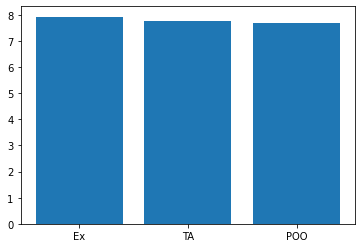

In [52]:
s = [train.loc[(train.BsmtQual == 'Ex')|(train.BsmtQual == 'Gd'),'SalePrice'].mean() , train.loc[(train.BsmtQual == 'TA'),'SalePrice'].mean() ,
     train.loc[(train.BsmtQual == 'Fa')|(train.BsmtQual == 'Po'),'SalePrice'].mean()]
plt.bar([0,1,2],s)
plt.xticks(ticks = [0,1,2],labels=['Ex','TA' , 'POO'])

([<matplotlib.axis.XTick at 0x7fdbbdb49ed0>,
 [Text(0, 0, 'Ex'), Text(0, 0, 'Gd'), Text(0, 0, 'TA'), Text(0, 0, 'POO')])

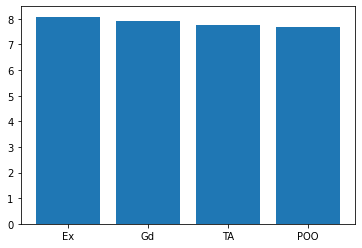

In [53]:
s = [train.loc[(train.BsmtQual == 'Ex'),'SalePrice'].mean() , train.loc[(train.BsmtQual == 'Gd'),'SalePrice'].mean(),train.loc[(train.BsmtQual == 'TA'),'SalePrice'].mean() ,
     train.loc[(train.BsmtQual == 'Fa')|(train.BsmtQual == 'Po'),'SalePrice'].mean()]
plt.bar([0,1,2,3],s)
plt.xticks(ticks = [0,1,2,3],labels=['Ex','Gd', 'TA' , 'POO'])

([<matplotlib.axis.XTick at 0x7fdbbdaaccd0>,
 [Text(0, 0, 'Ex'), Text(0, 0, 'TA'), Text(0, 0, 'POO')])

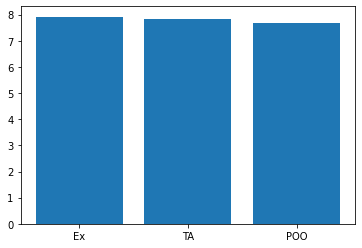

In [54]:
s = [train.loc[(train.BsmtCond == 'Ex')|(train.BsmtCond == 'Gd'),'SalePrice'].mean() , train.loc[(train.BsmtCond == 'TA'),'SalePrice'].mean() ,
     train.loc[(train.BsmtCond == 'Fa')|(train.BsmtCond == 'Po'),'SalePrice'].mean()]
plt.bar([0,1,2],s)
plt.xticks(ticks = [0,1,2],labels=['Ex','TA' , 'POO'])

In [55]:
s = train.groupby('MSSubClass')['PriceperSQFeet'].mean()
plt.bar(np.arange(len(s.index)),s.values)
plt.xticks(np.arange(len(s.index)),s.index)
    

KeyError: 'Column not found: PriceperSQFeet'

In [56]:
LotFrontage_finder =train.groupby('MSZoning')['LotFrontage'].mean()

KeyError: 'MSZoning'

In [57]:
train.LotShape.value_counts(dropna=False)

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [58]:
train.dtypes[train.dtypes == object]

GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

In [59]:
train.corr()['MasVnrArea'].sort_values()

MasVnrType_None      -0.679898
Age                  -0.311479
GarageType_Detchd    -0.182011
Foundation_BrkTil    -0.177335
Remodeled_Age        -0.177105
                        ...   
OverallQual           0.407252
garage_score          0.410804
SalePrice             0.421401
MasVnrType_BrkFace    0.571328
MasVnrArea            1.000000
Name: MasVnrArea, Length: 174, dtype: float64

In [60]:
train['PriceperSQFeet'] =train['SalePrice']/train['LotArea']
s = train.groupby('Neighborhood')['PriceperSQFeet'].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
train["Neighborhood"] = train["Neighborhood"].replace(s)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
train.Neighborhood

Id
1       0.748476
2       0.722092
3       0.748476
4       0.737862
5       0.735284
          ...   
1456    0.735499
1457    0.726982
1458    0.737862
1459    0.733003
1460    0.735283
Name: Neighborhood, Length: 1460, dtype: float64

In [63]:
test[pd.isnull(test.MSZoning)]['MSZoning']

AttributeError: 'DataFrame' object has no attribute 'MSZoning'

In [64]:
test2 = test.fillna(Nei_Most_Fr)

NameError: name 'Nei_Most_Fr' is not defined

In [65]:
test2[pd.isnull(test2.MSZoning)]['MSZoning']

NameError: name 'test2' is not defined

In [66]:
test['MSZoning'].combine_first(Nei_Most_Fr['MSZoning'])

KeyError: 'MSZoning'

In [67]:
test[pd.isnull(test.MSZoning)]['MSZoning']

AttributeError: 'DataFrame' object has no attribute 'MSZoning'

In [68]:
test.set_index("Neighborhood").MSZoning.fillna(Nei_Most_Fr.MSZoning,inplace=True)

AttributeError: 'DataFrame' object has no attribute 'MSZoning'

In [69]:
test[pd.isnull(test.MSZoning)]['MSZoning']

AttributeError: 'DataFrame' object has no attribute 'MSZoning'

In [70]:
test = test.fillna(test.drop('MSZoning',1).join(Nei_Most_Fr,on = 'Neighborhood'))

KeyError: "['MSZoning'] not found in axis"

In [71]:
test.groupby('Neighborhood')['MSZoning'].value_counts()

KeyError: 'Column not found: MSZoning'

In [72]:
print(test.loc[0,"MSZoning"],test2.loc[0,"MSZoning"])

KeyError: 0

In [73]:
test.MSZoning.value_counts(dropna=False)

AttributeError: 'DataFrame' object has no attribute 'MSZoning'

In [74]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [75]:
test[(pd.isnull(test.GarageFinish)) & (test.GarageFinish == 1)]

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,Neighborhood,OverallQual,MasVnrArea,ExterQual,ExterCond,...,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,garage_score
Id,,,,,,,,,,,,,,,,,,,,,


In [76]:
final_df.GarageFinish.value_counts(dropna=False)

NameError: name 'final_df' is not defined

In [77]:
final_df.GarageFinish.dtypes

NameError: name 'final_df' is not defined

In [78]:
final_df.Fence.value_counts(dropna=False)

NameError: name 'final_df' is not defined

In [79]:
final_df['1stFlrSF'].value_counts()

NameError: name 'final_df' is not defined

In [80]:
train.MSSubClass.value_counts(dropna=False)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [81]:
train.MasVnrType.value_counts()

AttributeError: 'DataFrame' object has no attribute 'MasVnrType'

In [82]:
train[pd.isnull(train.LotFrontage)]['MSZoning'].value_counts()

KeyError: 'MSZoning'

In [83]:
train.columns[train.dtypes==object]

Index(['GarageFinish', 'GarageQual', 'GarageCond'], dtype='object')

In [84]:
train[pd.isnull(train.SalePrice)]

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,Neighborhood,OverallQual,MasVnrArea,ExterQual,ExterCond,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,garage_score,Price_Per_Unit,PriceperSQFeet
Id,,,,,,,,,,,,,,,,,,,,,


In [85]:
np.abs(train.corr()['SalePrice']).sort_values(ascending =False).head(60)

SalePrice                1.000000
OverallQual              0.815044
GrLivArea                0.729385
Number_of_bathrooms      0.672592
garage_score             0.667667
TotalBsmtSF              0.609149
Age                      0.588782
Remodeled_Age            0.569453
TotRmsAbvGrd             0.532020
Foundation_PConc         0.529953
Fireplaces               0.488518
BsmtFinType1_GLQ         0.438494
MasVnrArea               0.421401
GarageType_Attchd        0.419583
LotArea                  0.398994
MasVnrType_None          0.394754
GarageType_Detchd        0.388393
LotFrontage              0.364380
has_central_air          0.359196
MSZoningis_RM            0.349896
Exterior2nd_VinylSd      0.337185
ext1st_VinylSd           0.335872
Foundation_CBlock        0.334712
WoodDeckSF               0.333121
GarageType_none          0.329116
SaleType_New             0.325110
SaleCondition_Partial    0.320482
OpenPorchSF              0.318872
Electrical_SBrkr         0.309979
MasVnrType_Sto

In [86]:
train.corr().loc['GrLivArea','LotArea']
train.corr().loc['MSSubClass','SalePrice']


-0.072480993339561

In [87]:
train.TotalBsmtSF[train.TotalBsmtSF==0]

Id
18      0.0
40      0.0
91      0.0
103     0.0
157     0.0
183     0.0
260     0.0
343     0.0
363     0.0
372     0.0
393     0.0
521     0.0
533     0.0
534     0.0
554     0.0
647     0.0
706     0.0
737     0.0
750     0.0
779     0.0
869     0.0
895     0.0
898     0.0
985     0.0
1001    0.0
1012    0.0
1036    0.0
1046    0.0
1049    0.0
1050    0.0
1091    0.0
1180    0.0
1217    0.0
1219    0.0
1233    0.0
1322    0.0
1413    0.0
Name: TotalBsmtSF, dtype: float64

In [88]:
pd.melt(train,id_vars = 'SalePrice' , value_vars = 'GrLivArea')

,SalePrice,variable,value
0,7.932610,GrLivArea,7.621711
1,7.878263,GrLivArea,7.303622
2,7.959618,GrLivArea,7.667292
3,7.774955,GrLivArea,7.625993
4,8.002875,GrLivArea,7.885038
...,...,...,...
1455,7.863875,GrLivArea,7.582374
1456,7.935404,GrLivArea,7.823588
1457,8.027382,GrLivArea,7.950767
1458,7.781006,GrLivArea,7.138857


In [89]:
total_df.BsmtExposure.value_counts(dropna=False)

AttributeError: 'DataFrame' object has no attribute 'BsmtExposure'

In [90]:
total_df[total_df.index.duplicated()]

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,Neighborhood,OverallQual,MasVnrArea,ExterQual,ExterCond,...,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,garage_score
Id,,,,,,,,,,,,,,,,,,,,,


In [91]:
total_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,Neighborhood,OverallQual,MasVnrArea,ExterQual,ExterCond,...,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,garage_score
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,Reg,Gtl,21.393421,7,196.0,Gd,TA,...,0,0,0,0,0,0,1,0,0,1096.0
2,20,80.0,9600,Reg,Gtl,18.081011,6,0.0,TA,TA,...,0,1,0,0,0,0,0,0,0,920.0
3,60,68.0,11250,IR1,Gtl,21.393421,7,162.0,Gd,TA,...,0,0,0,0,0,0,1,0,0,1216.0
4,70,60.0,9550,IR1,Gtl,21.043650,7,0.0,TA,TA,...,0,0,0,0,0,0,0,0,1,1926.0
5,60,84.0,14260,IR1,Gtl,25.668164,8,350.0,Gd,TA,...,0,0,0,0,0,0,1,0,0,2508.0


In [92]:
total_df.TotalBsmtSF.value_counts(dropna=False) 

0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1949.0     1
1231.0     1
1829.0     1
1475.0     1
1243.0     1
Name: TotalBsmtSF, Length: 1058, dtype: int64

In [93]:
total_df[pd.isnull(total_df.BsmtFullBath)].index

AttributeError: 'DataFrame' object has no attribute 'BsmtFullBath'

In [94]:
total_df.GarageQual.value_counts(dropna=False)

TA      2605
none     158
Fa       124
Gd        24
Po         5
Ex         3
Name: GarageQual, dtype: int64

In [95]:
total_df.Neighborhood

Id
1       21.393421
2       18.081011
3       21.393421
4       21.043650
5       25.668164
          ...    
2915    45.394765
2916    45.394765
2917    16.430881
2918    16.430881
2919    16.430881
Name: Neighborhood, Length: 2919, dtype: float64

In [96]:
train.columns[train.dtypes == object]

Index(['GarageFinish', 'GarageQual', 'GarageCond'], dtype='object')